In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_csv("bank-full.csv" , delimiter=";")

In [4]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
df.shape[0]

45211

In [6]:
df.shape[1]

17

In [7]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe(include='int64')

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [10]:
df.describe(include='object')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:

job_mapping = {'housemaid': 2, 'services': 4, 'admin.': 0, 'blue-collar': 1, 'technician': 3,
    'retired': 5, 'management': 6, 'unemployed': 7, 'self-employed': 8, 'unknown': 9,
    'entrepreneur': 10, 'student': 11}

if 'job' in df.columns:
    df['job'] = df['job'].map(job_mapping).fillna(1)  # Convert categories to numbers
else:
    print("Column 'job' not found in DataFrame.")


In [14]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [15]:
marital_mapping = {'married':2,"single":4,'divorced':6}
if 'marital' in df.columns:
    df['marital'] = df['marital'].map(job_mapping).fillna(3) 
else:
    print("Column 'marital' not found in DataFrame.")
    

In [16]:
df['marital'].unique()

array([3.])

In [17]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [18]:
education_mapping={'tertiary':0, 'secondary':2, 'unknown':4, 'primary':6}
if 'education' in df.columns:
    df['education'] = df['education'].map(education_mapping).fillna(4)
else:
    print("column'education'not found in df.")

In [19]:
df['education'].unique()

array([0, 2, 4, 6], dtype=int64)

In [20]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [21]:

default_mapping={'no':0, 'yes':1}
if 'default' in df.columns:
    df['default'] = df['default'].map(default_mapping).fillna(2)
else:
    print("column ' default' not found in df")

In [22]:
df['default'].unique()

array([0, 1], dtype=int64)

In [23]:

housing_mapping = {'yes': 0, 'no': 2}

if 'housing' in df.columns:
    df['housing'] = df['housing'].map(housing_mapping).fillna(2)
else:
    print("Column 'housing' not found in df")


In [24]:
df['housing'].unique()

array([0, 2], dtype=int64)

In [25]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
loan_mapping = {'no':0, 'yes':2}
if 'loan'in df.columns:
    df['loan'] = df['loan'].map(loan_mapping).fillna(2)

In [27]:
df['loan'].unique()

array([0, 2], dtype=int64)

In [28]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
contact_mapping = {'contact	':0, 'cellular':2, 'telephone':3}
if 'contact' in df.columns:
    df['contact'] = df['contact'].map(contact_mapping).fillna(3)
else:
    print("contact not found in df")

In [30]:
df['contact'].unique()

array([3., 2.])

In [31]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [32]:
month_mapping = {'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'jan':7, 'feb':8,
       'mar':9, 'apr':10, 'sep':11}
if 'month' in df.columns:
    df['month'] = df['month'].map(month_mapping).fillna(12)
else:
    print("month not found in df ")

In [33]:
df['month'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [34]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [35]:
poutcome_mapping = {'unknown':0, 'failure':2, 'other':4, 'success':6}
if 'poutcome' in df.columns:
    df['poutcome'] = df['poutcome'].map(poutcome_mapping).fillna(4)
else:
    print("poutcome not founf in df")

In [36]:
df['poutcome'].unique()

array([0, 2, 4, 6], dtype=int64)

In [37]:
df.rename(columns={'y': 'output'}, inplace=True)


In [38]:
df['output'].unique()

array(['no', 'yes'], dtype=object)

In [39]:
output_mapping = { 'no': 0, 'yes':2}
if 'output' in df.columns:
    df['output'] = df['output'].map(output_mapping).fillna(2)
else:
    print(" output not found in df")

In [40]:
df['output'].unique()

array([0, 2], dtype=int64)

In [41]:
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    6      3.0          0        0     2143        0     0      3.0   
1   44    3      3.0          2        0       29        0     0      3.0   
2   33   10      3.0          2        0        2        0     2      3.0   
3   47    1      3.0          4        0     1506        0     0      3.0   
4   33    9      3.0          4        0        1        2     0      3.0   

   day  month  duration  campaign  pdays  previous  poutcome  output  
0    5      0       261         1     -1         0         0       0  
1    5      0       151         1     -1         0         0       0  
2    5      0        76         1     -1         0         0       0  
3    5      0        92         1     -1         0         0       0  
4    5      0       198         1     -1         0         0       0

In [42]:
df.describe()

age           job  marital     education       default  \
count  45211.000000  45211.000000  45211.0  45211.000000  45211.000000   
mean      40.936210      3.742894      3.0      2.099887      0.018027   
std       10.618762      2.836211      0.0      1.937973      0.133049   
min       18.000000      0.000000      3.0      0.000000      0.000000   
25%       33.000000      1.000000      3.0      0.000000      0.000000   
50%       39.000000      3.000000      3.0      2.000000      0.000000   
75%       48.000000      6.000000      3.0      2.000000      0.000000   
max       95.000000     11.000000      3.0      6.000000      1.000000   

             balance       housing          loan       contact           day  \
count   45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     1362.272058      0.888324      0.320453      2.352259     15.806419   
std      3044.765829      0.993756      0.733640      0.477680      8.322476   
min     -8019.000000      0.000000      0.000000      2.000000      1.000000   
25%        72.000000      0.000000      0.000000      2.000000      8.000000   
50%       448.000000      0.000000      0.000000      2.000000     16.000000   
75%      1428.000000      2.000000      0.000000      3.000000     21.000000   
max    102127.000000      2.000000      2.000000      3.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       2.940722    258.163080      2.763841     40.197828      0.580323   
std        3.179741    257.527812      3.098021    100.128746      2.303441   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        0.000000    103.000000      1.000000     -1.000000      0.000000   
50%        2.000000    180.000000      2.000000     -1.000000      0.000000   
75%        5.000000    319.000000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome        output  
count  45211.000000  45211.000000  
mean       0.580124      0.233970  
std        1.396939      0.642811  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        6.000000      2.000000

In [43]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
output       0
dtype: int64

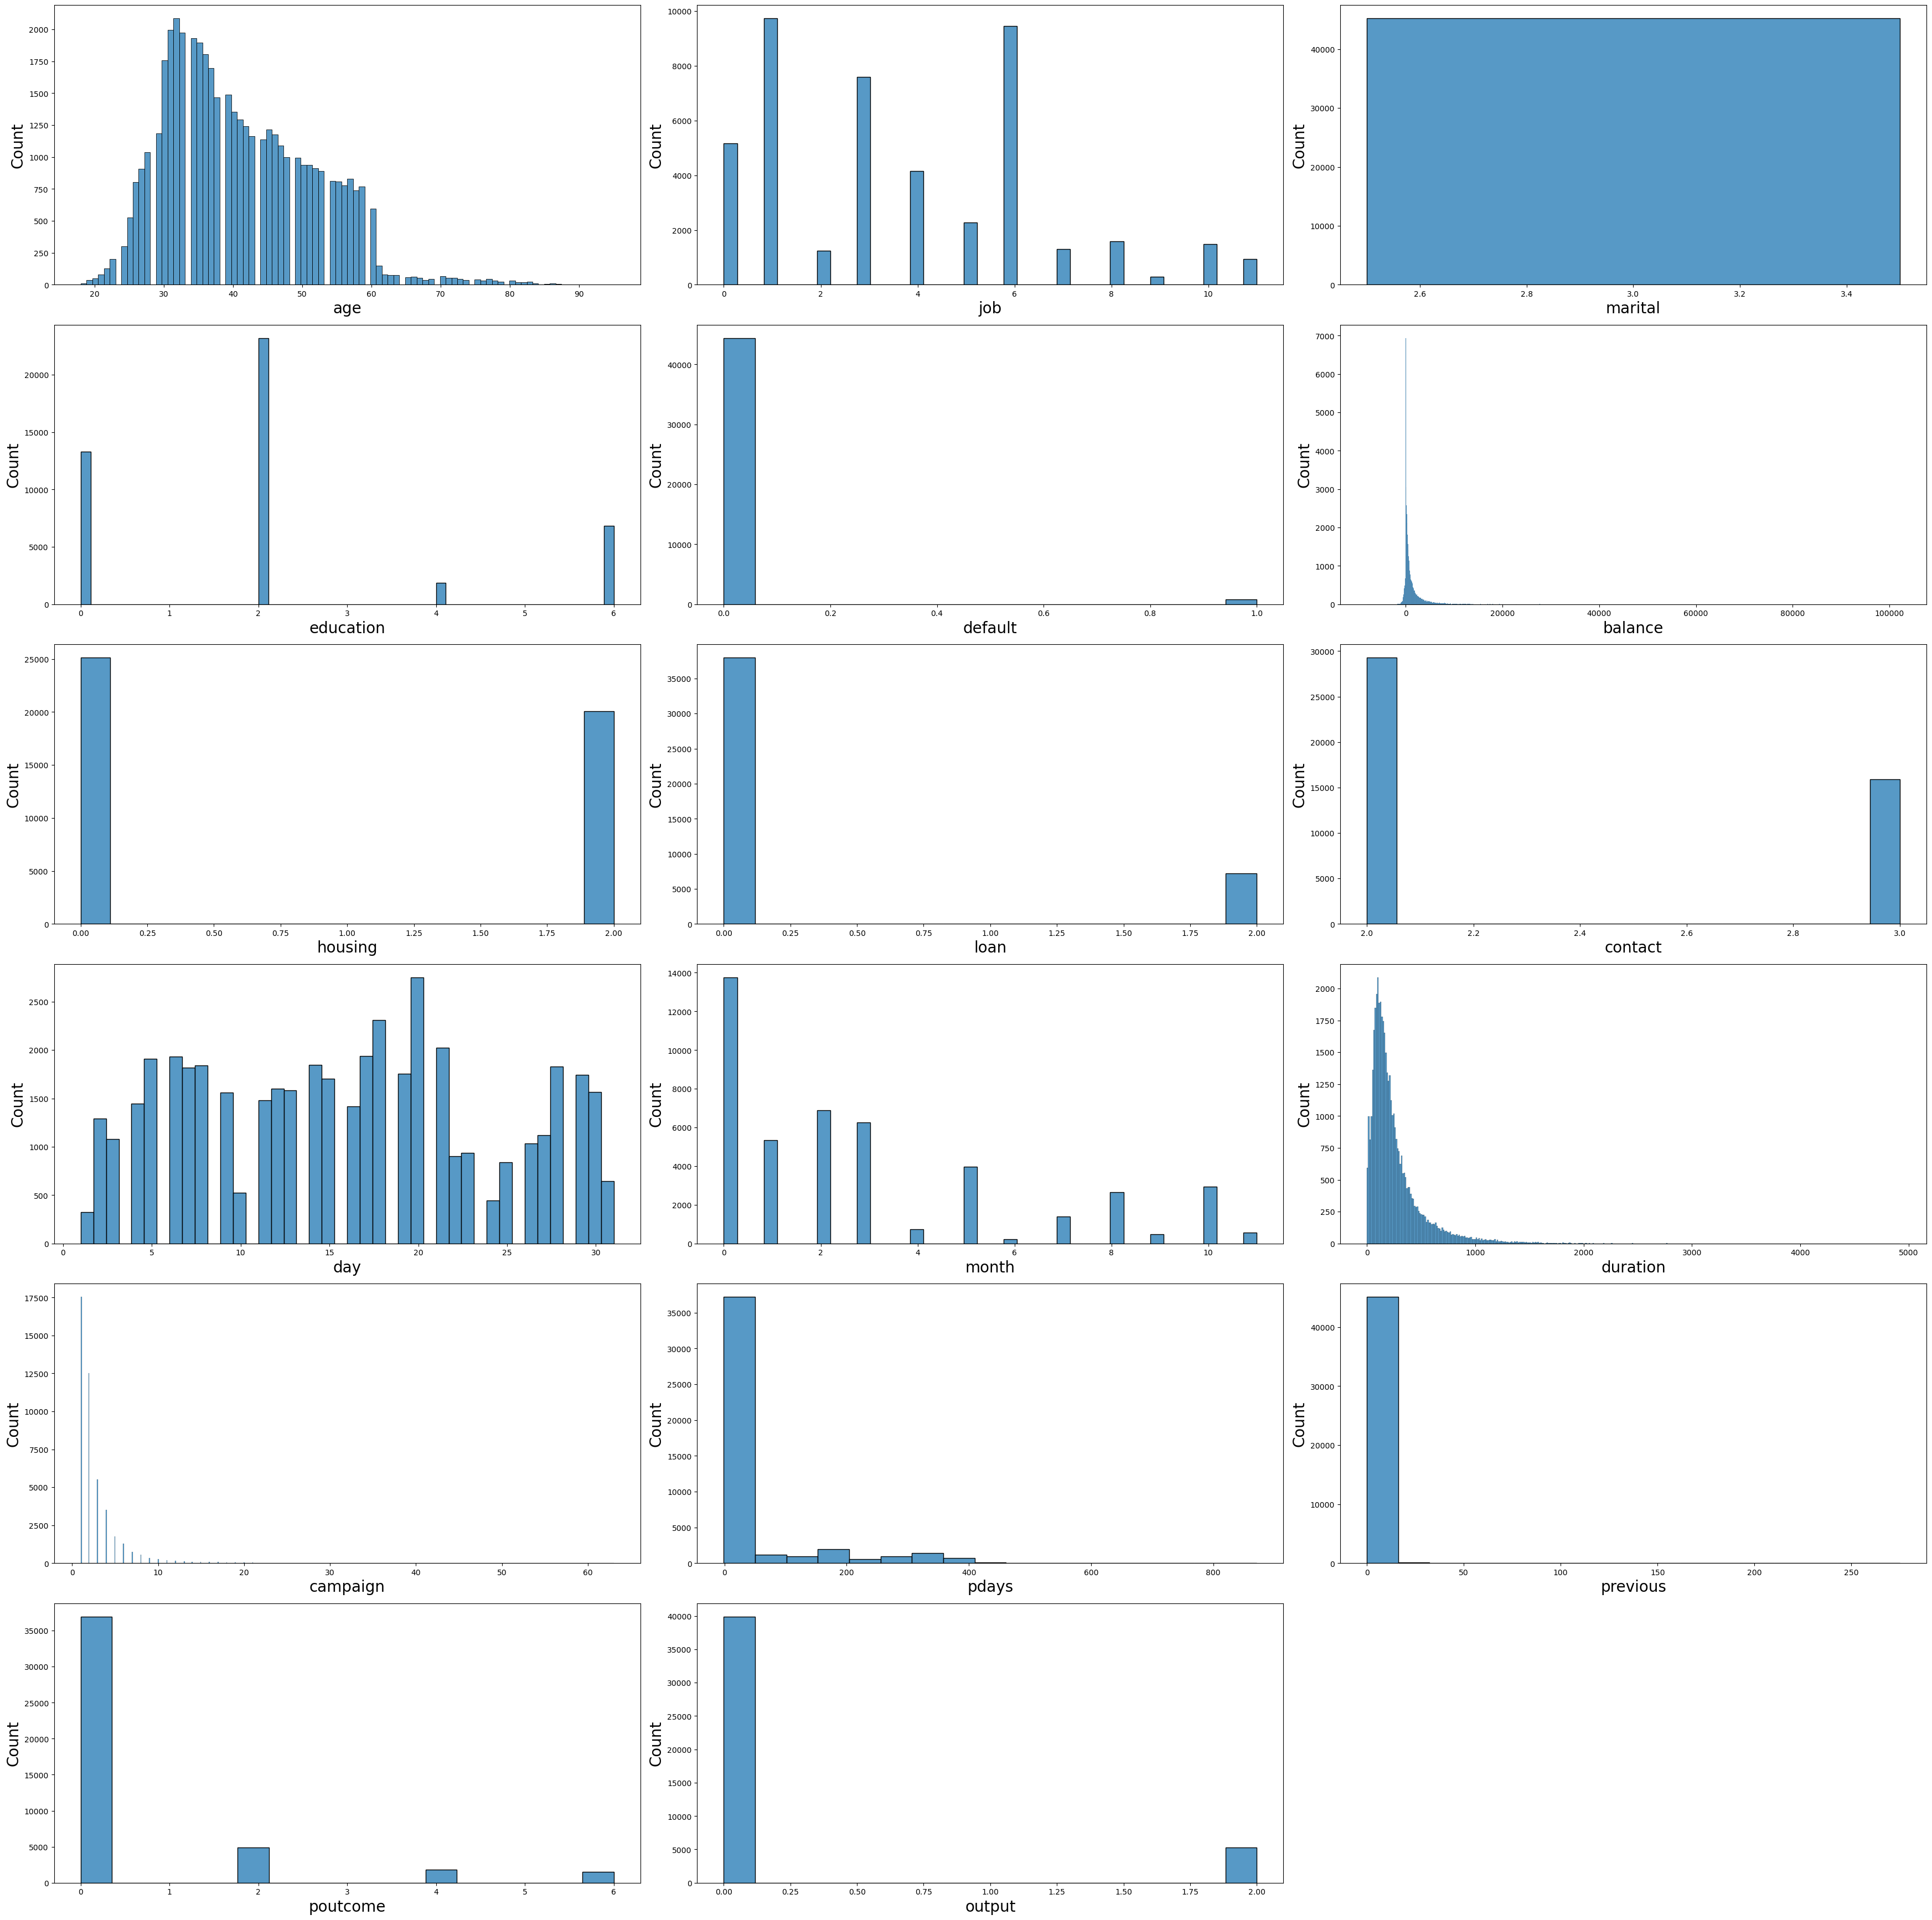

In [44]:
plt.figure(figsize=(35,40),facecolor='white') #Univariate Analysis
plotnumber=1

for column in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber) #subplot helps to use multiplot in one output.
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [45]:
df.isnull()

age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome  \
0        False  False  False     False     False  False     False     False   
1        False  False  False     False     False  False     False     False   
2        False  False  False     False     False  False     False     False   
3        False  False  False     False     False  False     False     False   
4        False  False  False     False     False  False     False     False   
...        ...    ...    ...       ...       ...    ...       ...       ...   
45206    False  False  False     False     False  False     False     False   
45207    False  False  False     False     False  False     False     False   
45208    False  False  False     False     False  False     False     False   
45209    False  False  False     False     False  False     False     False   
45210    False  False  False     False     False  False     False     False   

       output  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
45206   False  
45207   False  
45208   False  
45209   False  
45210   False  

[45211 rows x 17 columns]

In [46]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
output       0
dtype: int64

In [47]:
df.age.replace(0,np.median(df.age),inplace=True)
df.job.replace(0,np.median(df.job),inplace=True)
df.	marital.replace(0,np.median(df.	marital),inplace=True)
df.education .replace(0,np.median(df.education ),inplace=True)
df.default.replace(0,np.median(df.default),inplace=True)
df.balance.replace(0,np.median(df.balance),inplace=True)
df.housing.replace(0,np.median(df.housing),inplace=True)
df.loan.replace(0,np.median(df.loan),inplace=True)
df.contact.replace(0,np.median(df.contact),inplace=True)
df.day.replace(0,np.median(df.day),inplace=True)
df.month.replace(0,np.median(df.month),inplace=True)
df.duration.replace(0,np.median(df.duration),inplace=True)
df.pdays  .replace(0,np.median(df.pdays  ),inplace=True)
df.previous.replace(0,np.median(df.previous),inplace=True)
df.poutcome .replace(0,np.median(df.poutcome ),inplace=True)
df.output .replace(0,np.median(df.output ),inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_2188\2636560532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.replace(0,np.median(df.age),inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_2188\2636560532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

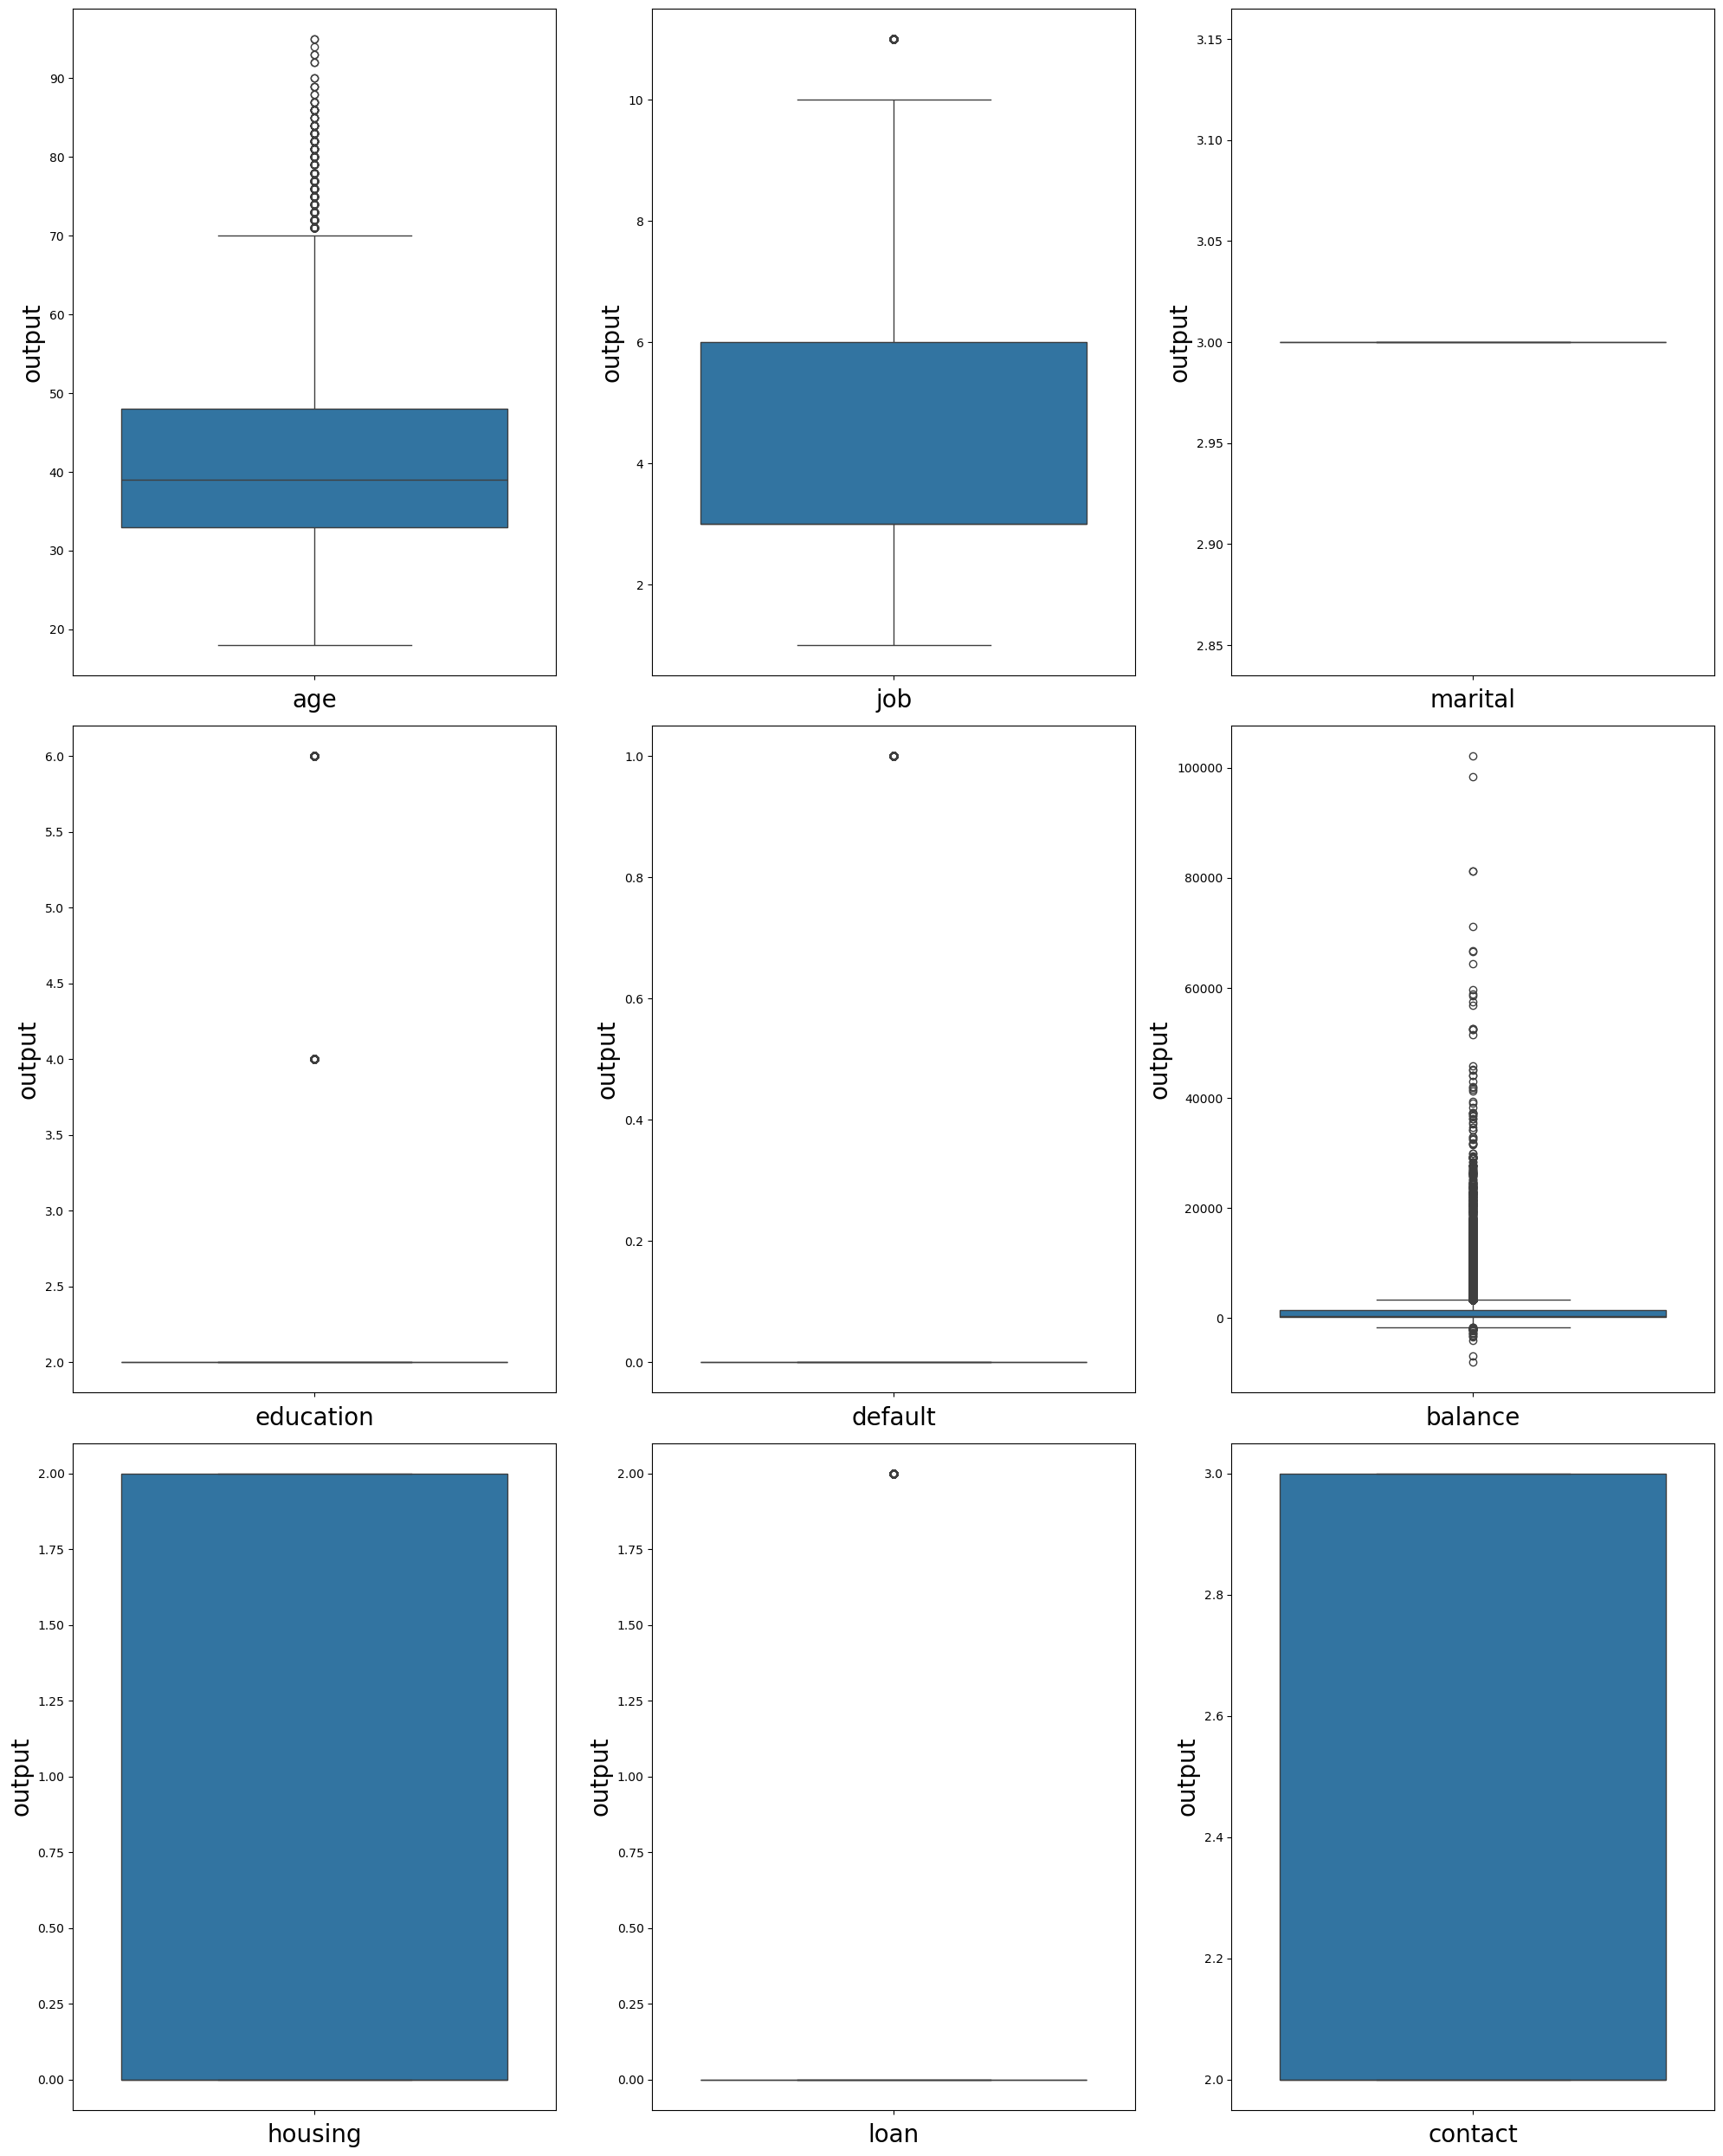

In [48]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('output',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Handling outlier

In [50]:
!pip install ydata-profiling


In [51]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()  # View in Jupyter Notebook


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 21.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
from sklearn.preprocessing import LabelEncoder #Using Label Encodoer for make as it is nominal data.



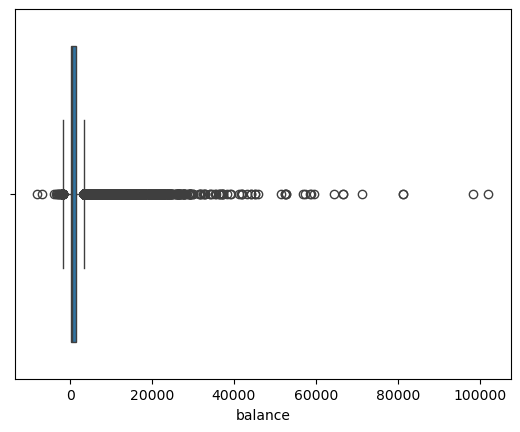

In [53]:
sns.boxplot(x='balance',data=df) 
plt.show()


In [54]:
from scipy.stats.mstats import winsorize

trim_percentage = 0.05

# Winsorize the specified column
df['balance'] = winsorize(df['balance'], limits=trim_percentage)


In [55]:
# Calculate quartiles
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

C:\Users\Hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [56]:
len(df.loc[df['balance']>upper_bound])

4976

In [57]:
len(df.loc[df['balance']<lower_bound])

0

In [58]:
df.loc[df['balance']>upper_bound,'balance']=np.median(df.balance)
len(df.loc[df['balance']>upper_bound])

0

In [59]:
df.loc[df['balance']<lower_bound,'balance']=np.median(df.balance)
len(df.loc[df['balance']<lower_bound])

0

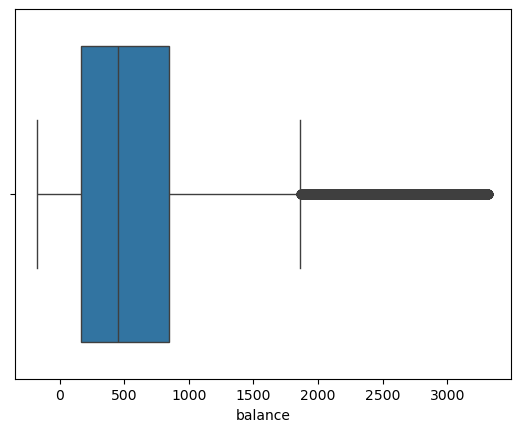

In [60]:
sns.boxplot(x='balance',data=df) #Outltiers have been handled
plt.show()


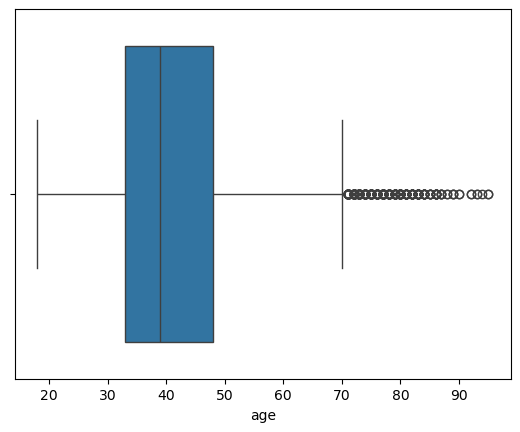

In [61]:
sns.boxplot(x='age',data=df)
plt.show()

In [62]:
df['age'] = winsorize(df['age'], limits=trim_percentage)

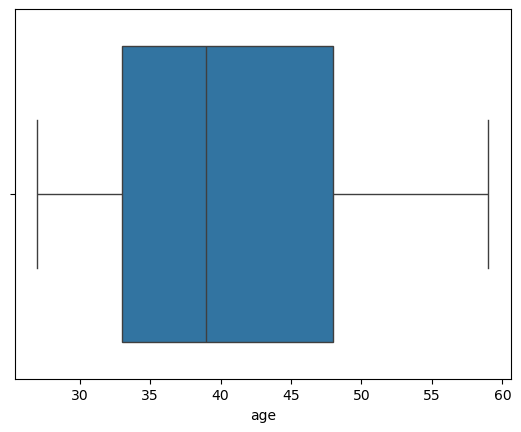

In [63]:
sns.boxplot(x='age',data=df)
plt.show()

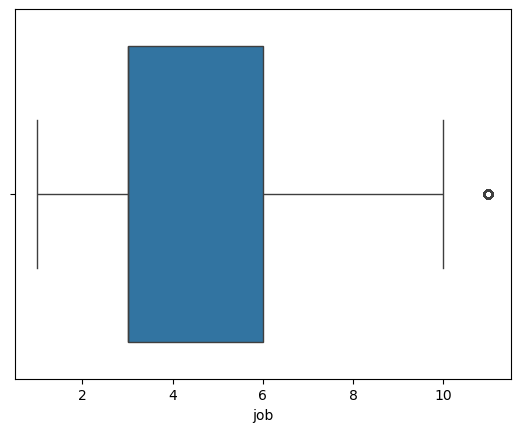

In [64]:
sns.boxplot(x='job',data=df)
plt.show()

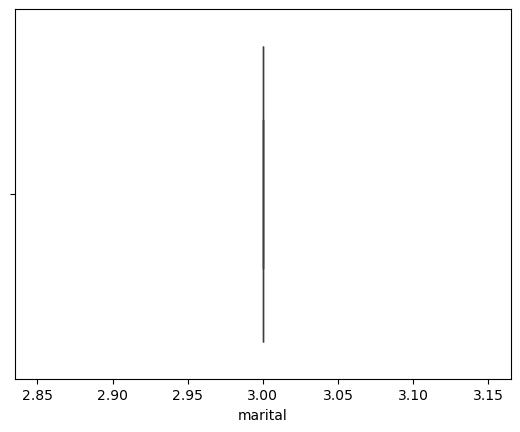

In [65]:
sns.boxplot(x='marital',data= df)
plt.show()

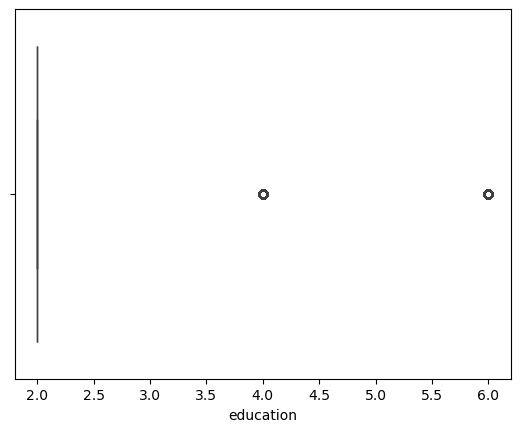

In [66]:
sns.boxplot(x='education',data=df)
plt.show()

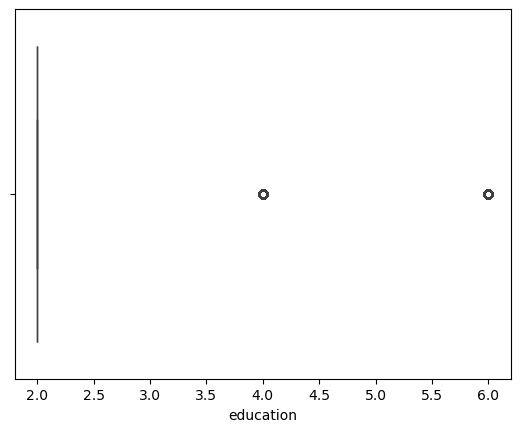

In [67]:
df['education'] = winsorize(df['education'], limits=trim_percentage)
sns.boxplot(x='education',data=df)
plt.show()

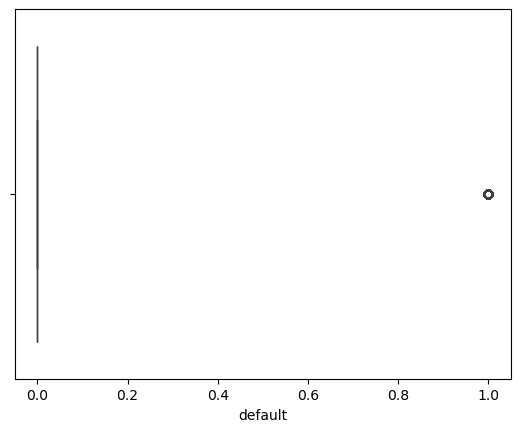

In [68]:
sns.boxplot(x='default',data=df)
plt.show()

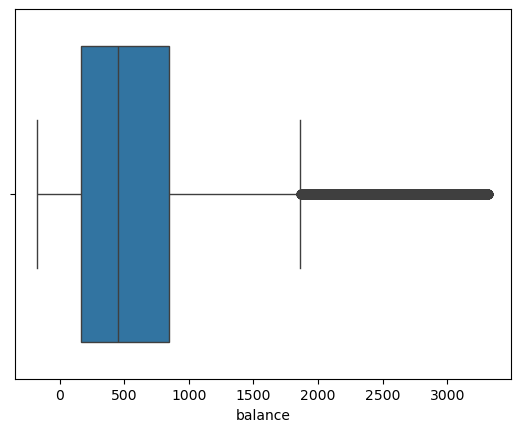

In [69]:
sns.boxplot(x='balance',data=df)
plt.show()

In [70]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

C:\Users\Hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [71]:
len(df.loc[df['balance']>upper_bound])

4055

In [72]:
len(df.loc[df['balance']<lower_bound])

0

In [73]:
df.loc[df['balance']>upper_bound,'balance']=np.median(df.balance)
len(df.loc[df['balance']>upper_bound])

0

In [74]:
df.loc[df['balance']<lower_bound,'balance']=np.median(df.balance)
len(df.loc[df['balance']<lower_bound])

0

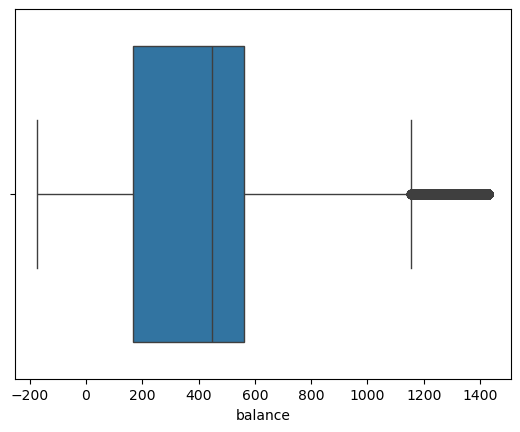

In [75]:
df['balance'] = winsorize(df['balance'], limits=trim_percentage)
sns.boxplot(x='balance',data=df)
plt.show()

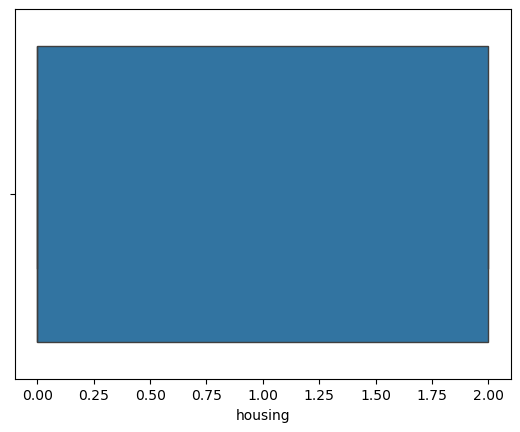

In [76]:
sns.boxplot(x='housing',data=df)
plt.show()

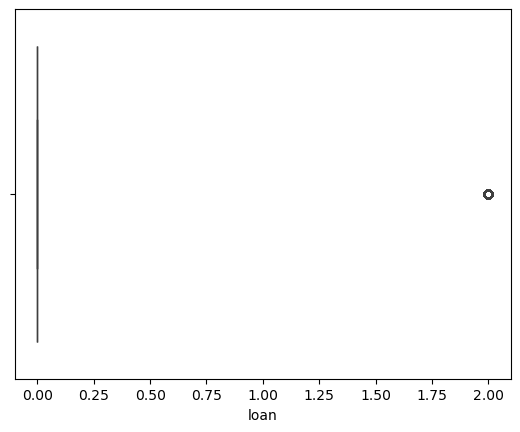

In [77]:
sns.boxplot(x='loan',data=df)
plt.show()

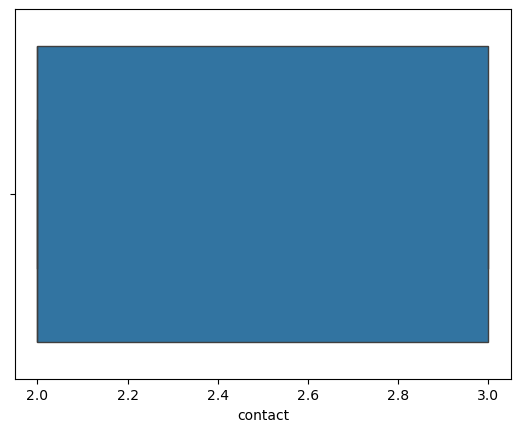

In [78]:
sns.boxplot(x='contact',data=df)
plt.show()

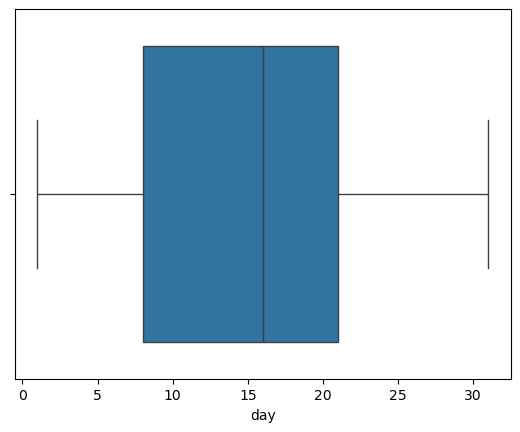

In [79]:
sns.boxplot(x='day',data=df)
plt.show()

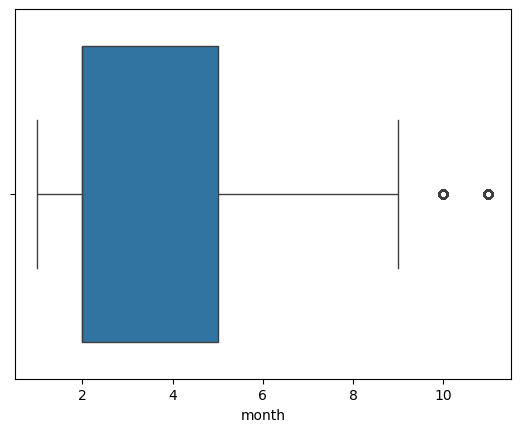

In [80]:
sns.boxplot(x='month',data=df)
plt.show()

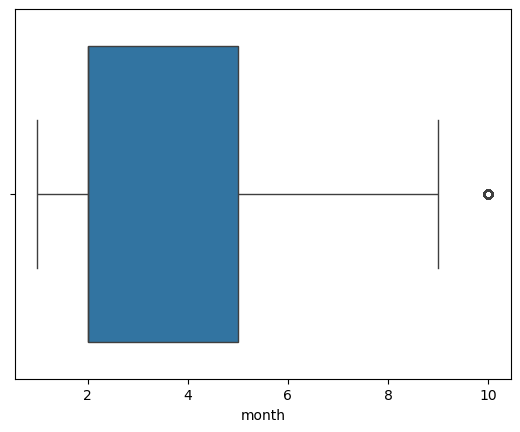

In [81]:
df['month'] = winsorize(df['month'], limits=trim_percentage)
sns.boxplot(x='month',data=df)
plt.show()

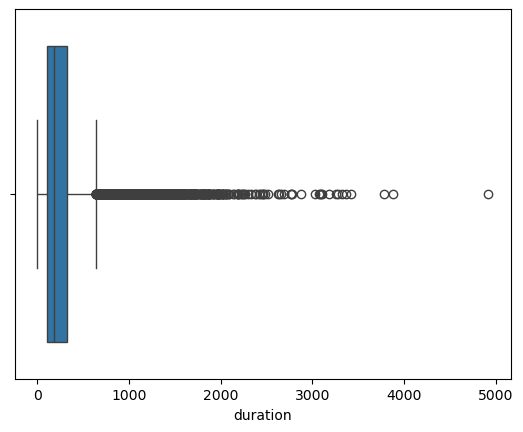

In [82]:
sns.boxplot(x='duration',data=df)
plt.show()

In [83]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [84]:
len(df.loc[df['duration']>upper_bound])


3235

In [85]:
len(df.loc[df['duration']<lower_bound])


0

In [86]:
df.loc[df['duration']>upper_bound,'duration']=np.median(df.duration)
len(df.loc[df['duration']>upper_bound])

0

In [87]:
df.loc[df['duration']<lower_bound,'duration']=np.median(df.duration)
len(df.loc[df['duration']<lower_bound])

0

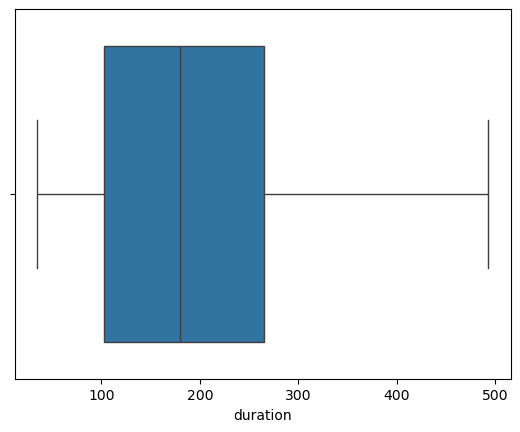

In [88]:
df['duration'] = winsorize(df['duration'], limits=trim_percentage)
sns.boxplot(x='duration',data=df)
plt.show()

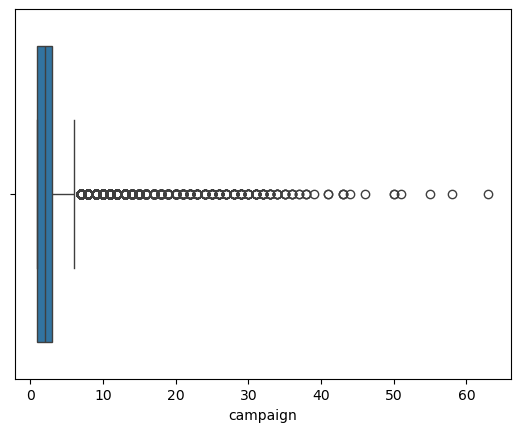

In [89]:
sns.boxplot(x='campaign',data=df)
plt.show()

In [90]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [91]:
len(df.loc[df['campaign']>upper_bound])

3064

In [92]:
len(df.loc[df['campaign']<lower_bound])

0

In [93]:
df.loc[df['campaign']>upper_bound,'campaign']=np.median(df.campaign)
len(df.loc[df['campaign']>upper_bound])

0

In [94]:
df.loc[df['campaign']<lower_bound,'campaign']=np.median(df.campaign)
len(df.loc[df['campaign']>lower_bound])

45211

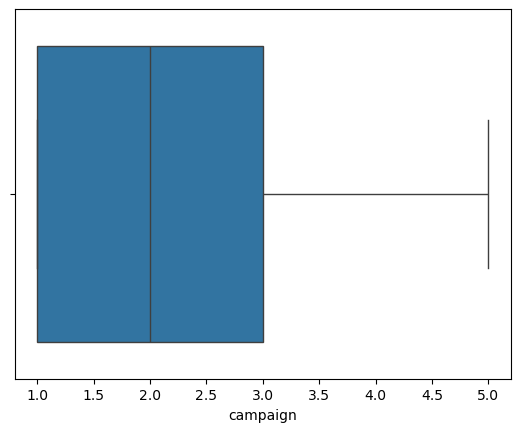

In [95]:
df['campaign'] = winsorize(df['campaign'], limits=trim_percentage)
sns.boxplot(x='campaign',data=df)
plt.show()

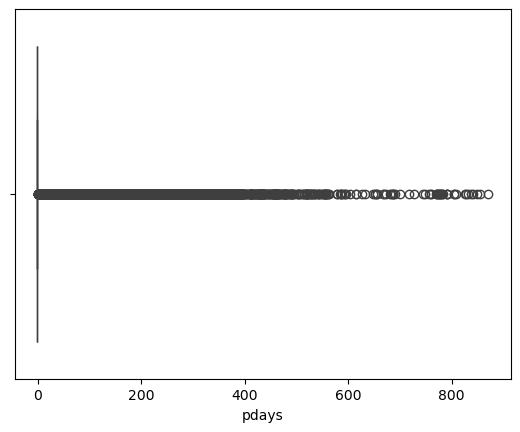

In [96]:
sns.boxplot(x='pdays',data=df)
plt.show()

In [97]:
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [98]:
len(df.loc[df['pdays']>upper_bound])

8257

In [99]:
len(df.loc[df['pdays']<lower_bound])

0

In [100]:
df.loc[df['pdays']>upper_bound,'pdays']=np.median(df.pdays)
len(df.loc[df['pdays']>upper_bound])

0

In [101]:
df.loc[df['pdays']<lower_bound,'pdays']=np.median(df.pdays)
len(df.loc[df['pdays']<lower_bound])

0

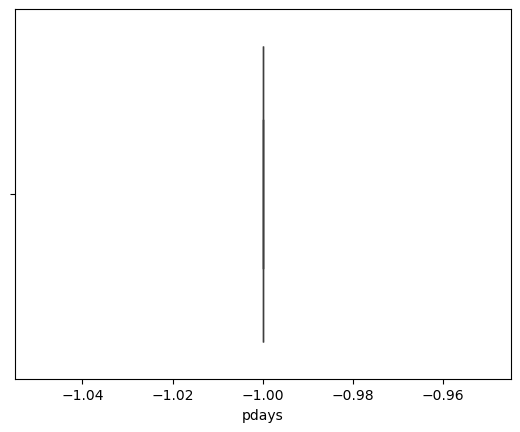

In [102]:
df['pdays'] = winsorize(df['pdays'], limits=trim_percentage)
sns.boxplot(x='pdays',data=df)
plt.show()

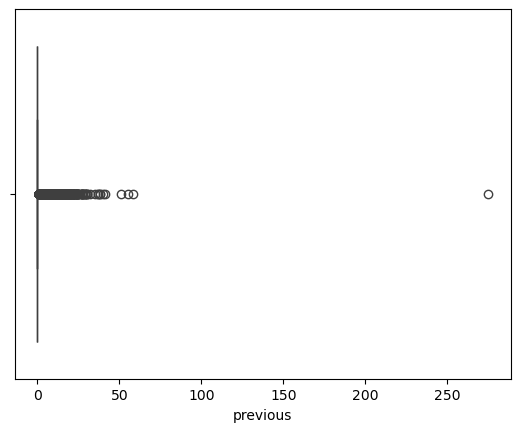

In [103]:
sns.boxplot(x='previous',data=df)
plt.show()

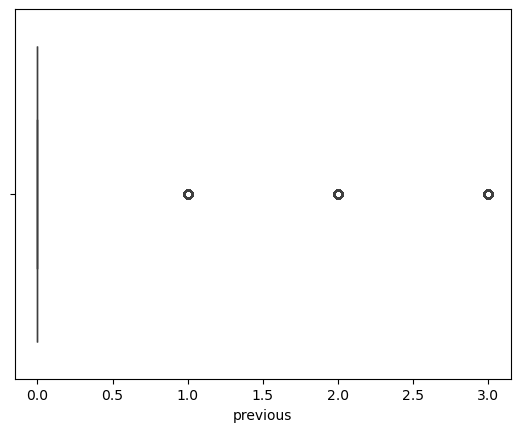

In [104]:
df['previous'] = winsorize(df['previous'], limits=trim_percentage)
sns.boxplot(x='previous',data=df)
plt.show()

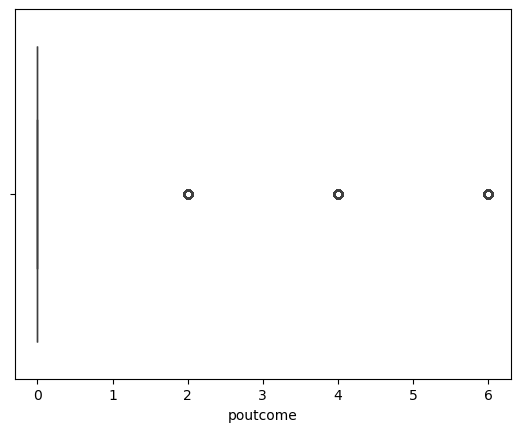

In [105]:
sns.boxplot(x='poutcome',data=df)
plt.show()

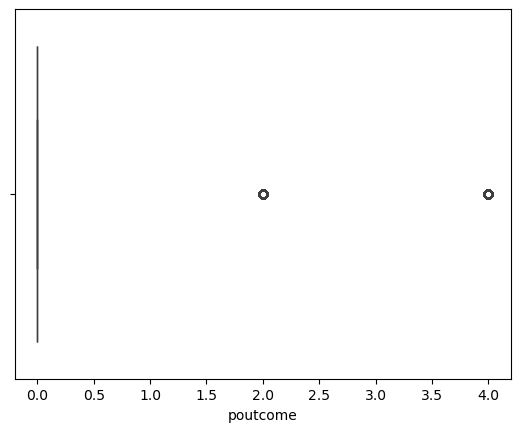

In [106]:
df['poutcome'] = winsorize(df['poutcome'], limits=trim_percentage)
sns.boxplot(x='poutcome',data=df)
plt.show()

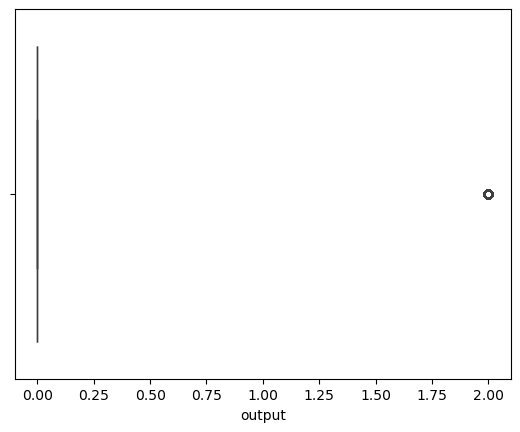

In [107]:
sns.boxplot(x='output',data=df)
plt.show()

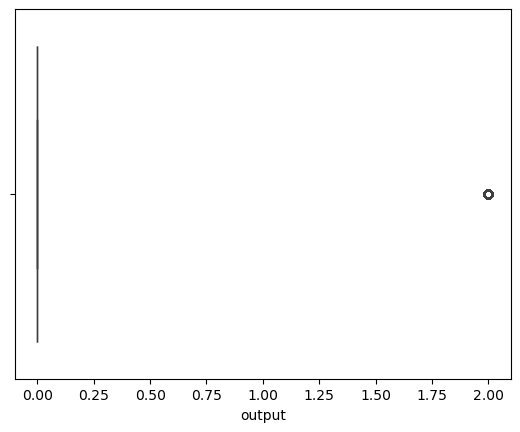

In [108]:
df['output'] = winsorize(df['output'], limits=trim_percentage)
sns.boxplot(x='output',data=df)
plt.show()

In [109]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'output'],
      dtype='object')

## TRANSFORMATION

<Figure size 300x400 with 0 Axes>

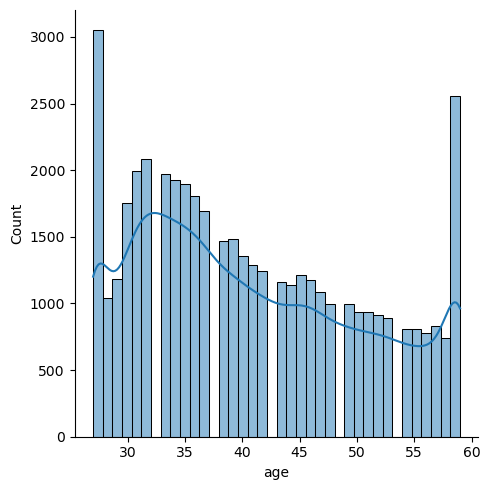

In [111]:
plt.figure(figsize=(3,4))
sns.displot(x=df['age'], kde= True)
plt.show() #Almost normal distribution

<Figure size 300x400 with 0 Axes>

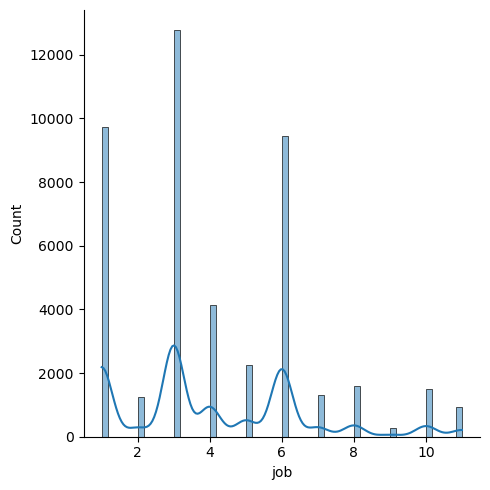

In [112]:
plt.figure(figsize=(3,4))
sns.displot(x=df['job'], kde= True)
plt.show() #Almost normal distribution

<Figure size 300x400 with 0 Axes>

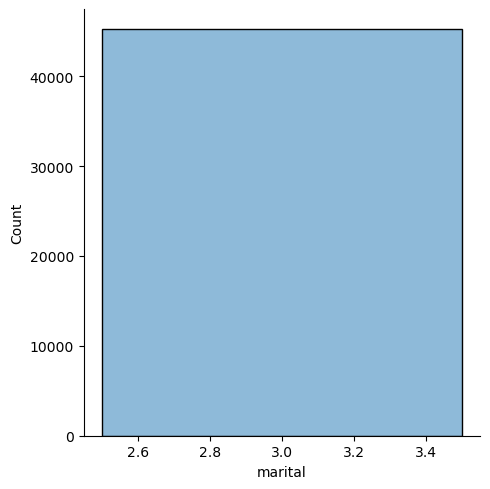

In [113]:
plt.figure(figsize=(3,4))
sns.displot(x=df['marital'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

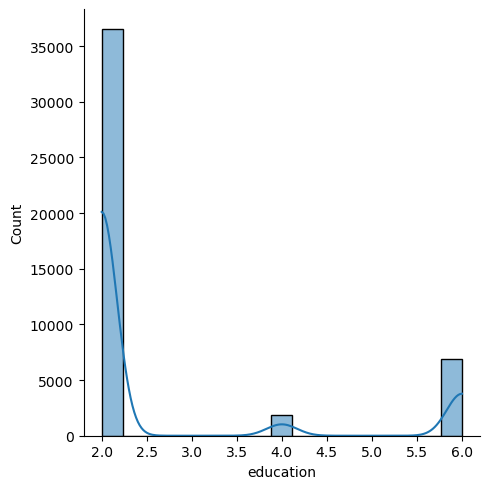

In [114]:
plt.figure(figsize=(3,4))
sns.displot(x=df['education'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

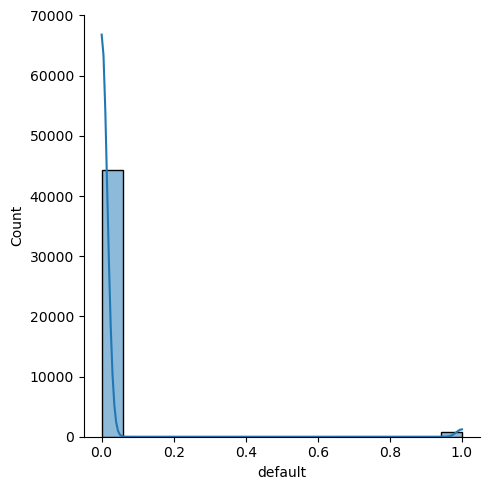

In [115]:
plt.figure(figsize=(3,4))
sns.displot(x=df['default'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

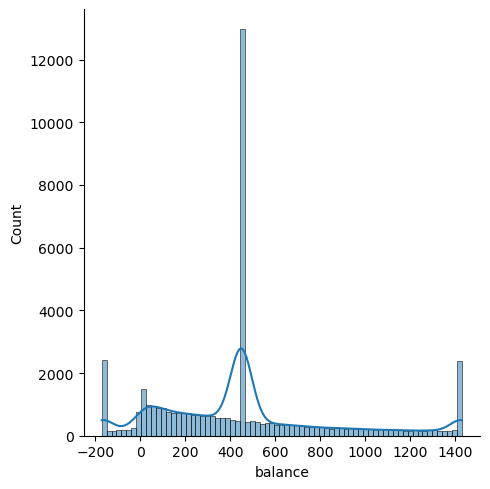

In [116]:
plt.figure(figsize=(3,4))
sns.displot(x=df['balance'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

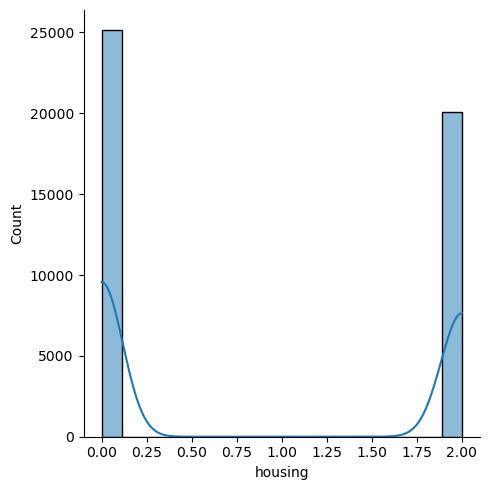

In [117]:
plt.figure(figsize=(3,4))
sns.displot(x=df['housing'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

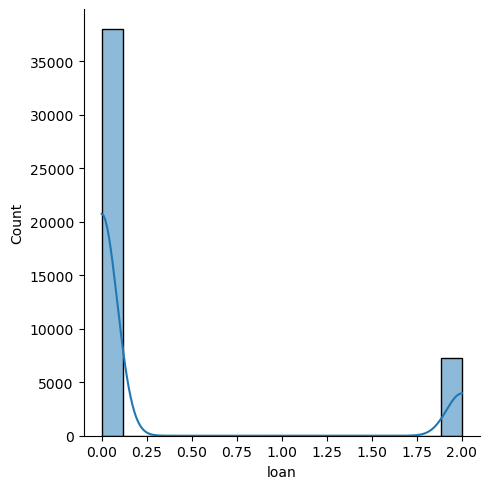

In [118]:
plt.figure(figsize=(3,4))
sns.displot(x=df['loan'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

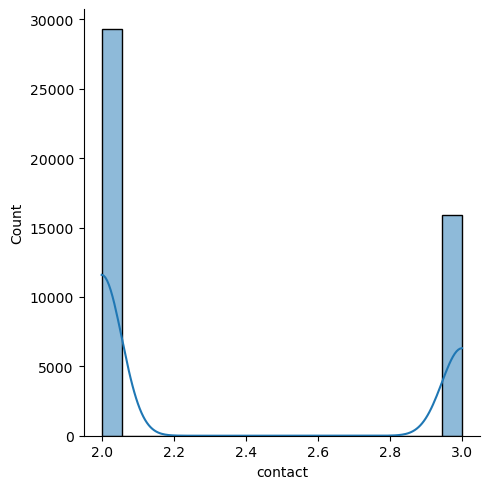

In [119]:
plt.figure(figsize=(3,4))
sns.displot(x=df['contact'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

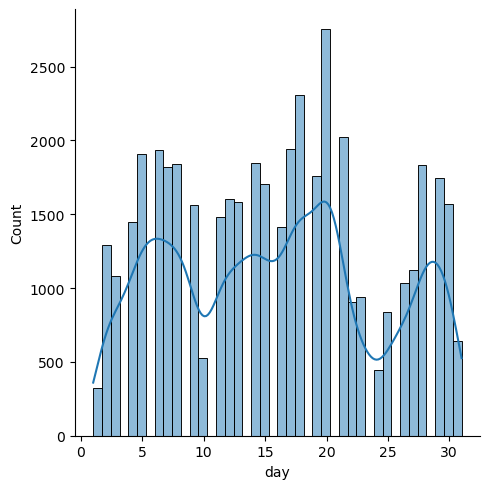

In [120]:
plt.figure(figsize=(3,4))
sns.displot(x=df['day'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

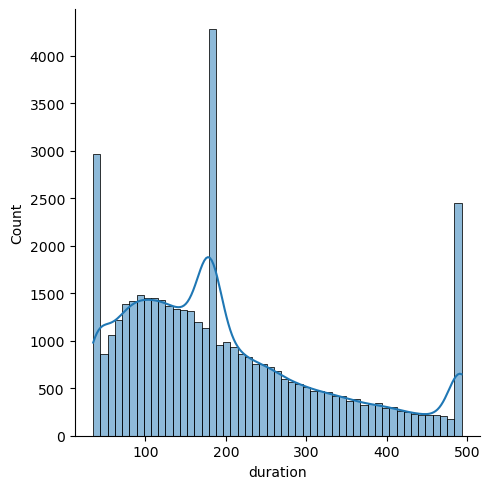

In [121]:
plt.figure(figsize=(3,4))
sns.displot(x=df['duration'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

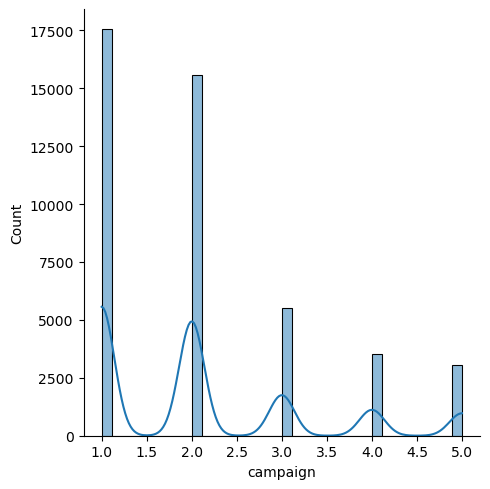

In [122]:
plt.figure(figsize=(3,4))
sns.displot(x=df['campaign'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

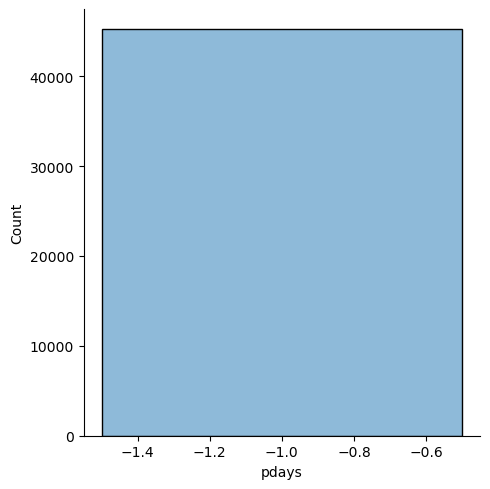

In [123]:
plt.figure(figsize=(3,4))
sns.displot(x=df['pdays'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

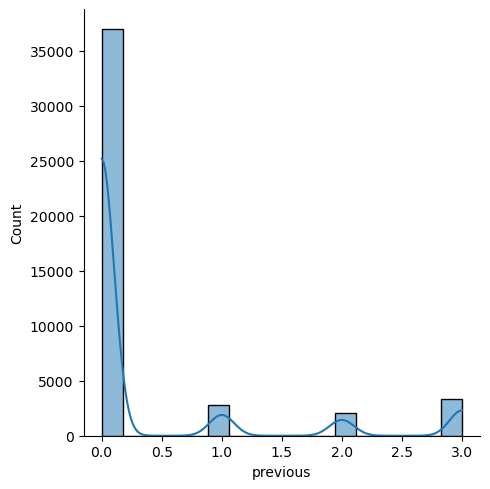

In [124]:
plt.figure(figsize=(3,4))
sns.displot(x=df['previous'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

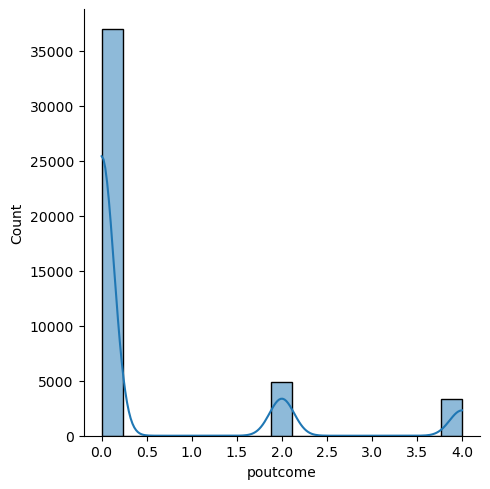

In [125]:
plt.figure(figsize=(3,4))
sns.displot(x=df['poutcome'], kde= True)
plt.show() 

<Figure size 300x400 with 0 Axes>

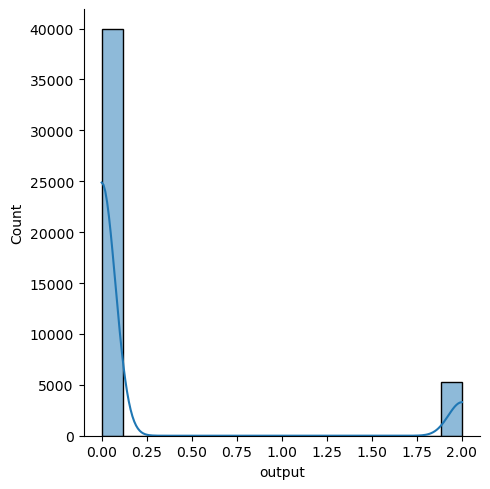

In [126]:
plt.figure(figsize=(3,4))
sns.displot(x=df['output'], kde= True)
plt.show() 

## Future selection

In [128]:
#sns.pairplot(df, diag_kind='kde', corner=True)
#plt.show()


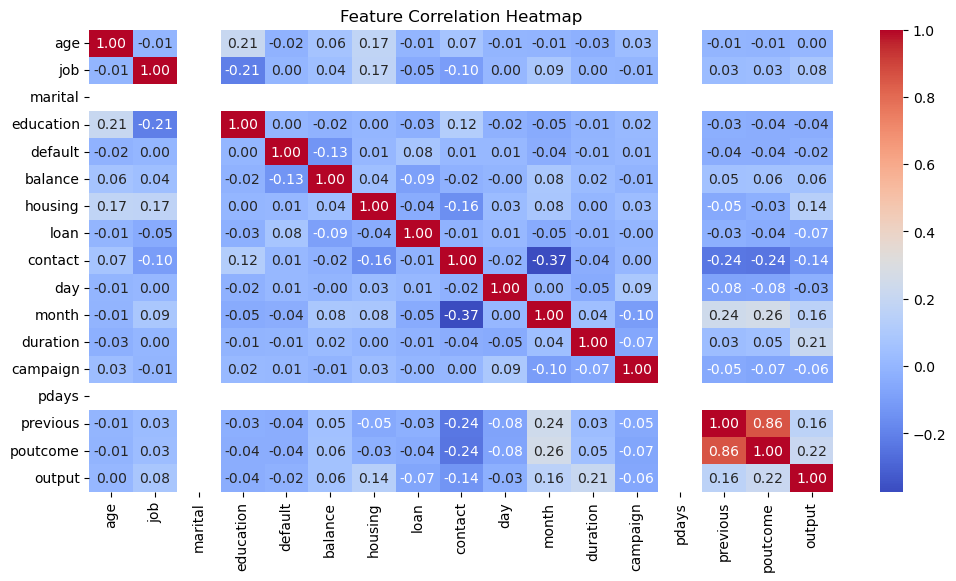

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [130]:
df = df.drop(columns=['pdays'])

In [131]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'output'],
      dtype='object')

In [132]:
## Scaling & Model Creation 

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [134]:
X=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome']]

Y=df.output


In [184]:
from sklearn.model_selection import train_test_split
X = df.drop("output", axis=1)
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [186]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


## Model Evaluation


In [218]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8937299568727193

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           2       0.61      0.33      0.42      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.89      0.88      9043


Confusion Matrix:
 [[7727  225]
 [ 736  355]]


In [220]:
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) 

F1 Score: 0.8791351031522974
